In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. Reading and Preparing The DataSet

#### Reading , Check Data Types of Each Column , Also Check Columns Names and check if there are null values or not

In [36]:
df=pd.read_csv('FuelConsumptionCo2.csv')

In [37]:
df.columns

Index(['MODELYEAR', 'Brands', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

> ###### most of columns names are capital letter , but other like `Brands` Is not capital letter

In [38]:
df.columns=[col_name.upper() for col_name in df.columns.to_list()]
df.head()

,MODELYEAR,BRANDS,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV_SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   BRANDS                    1067 non-null   object 
 2   VEHICLECLASS              1067 non-null   object 
 3   ENGINESIZE                1067 non-null   float64
 4   CYLINDERS                 1067 non-null   int64  
 5   TRANSMISSION              1067 non-null   object 
 6   FUELTYPE                  1067 non-null   object 
 7   FUELCONSUMPTION_CITY      1067 non-null   float64
 8   FUELCONSUMPTION_HWY       1067 non-null   float64
 9   FUELCONSUMPTION_COMB      1067 non-null   float64
 10  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 11  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 100.2+ KB


> ###### Each Column and It's Datatype is Correct 

In [40]:
df.isna().sum()

MODELYEAR                   0
BRANDS                      0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

> ###### Each Column doesn't have any  null values

# 2. What Is The Top 5 Repeated `BRANDS` Presented in the Dataset 

In [41]:
df['BRANDS'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

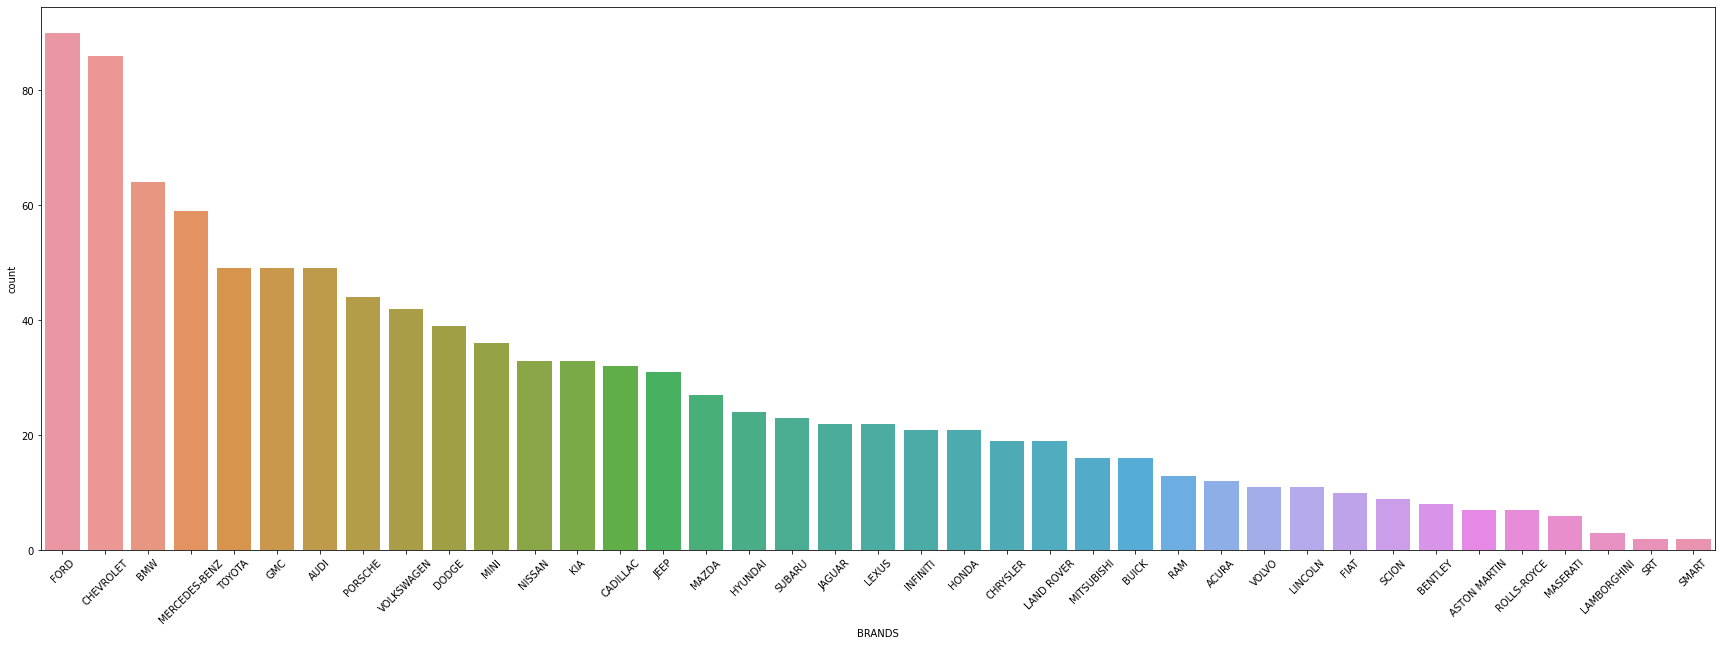

In [42]:
plt.figure(figsize=[30,10])
sns.countplot(df['BRANDS'],order=df['BRANDS'].value_counts().index)
plt.xticks(rotation=45)

In [44]:
df['BRANDS'].value_counts().head(6)

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
TOYOTA           49
GMC              49
Name: BRANDS, dtype: int64

# 3.Which One of the Top 6 Car Brands Emit the Most Carbon Dioxide?

In [45]:
top_6_brand=df['BRANDS'].value_counts().head(6).keys().to_list()
df_top_6=df[df['BRANDS'].isin(top_6_brand)]



In [46]:
top_6_brand

['FORD', 'CHEVROLET', 'BMW', 'MERCEDES-BENZ', 'TOYOTA', 'GMC']

In [49]:
df_top_6.groupby(['BRANDS'])['CO2EMISSIONS'].mean()

BRANDS
BMW              252.109375
CHEVROLET        272.930233
FORD             265.955556
GMC              328.244898
MERCEDES-BENZ    277.677966
TOYOTA           235.183673
Name: CO2EMISSIONS, dtype: float64

> ###### GMC is the most Car Brand That Emits CO2 , Out oF the Other Top Five Brands 

# 4 What Are The `VEHICLECLASS` for Each Top 5 Car Brands ?

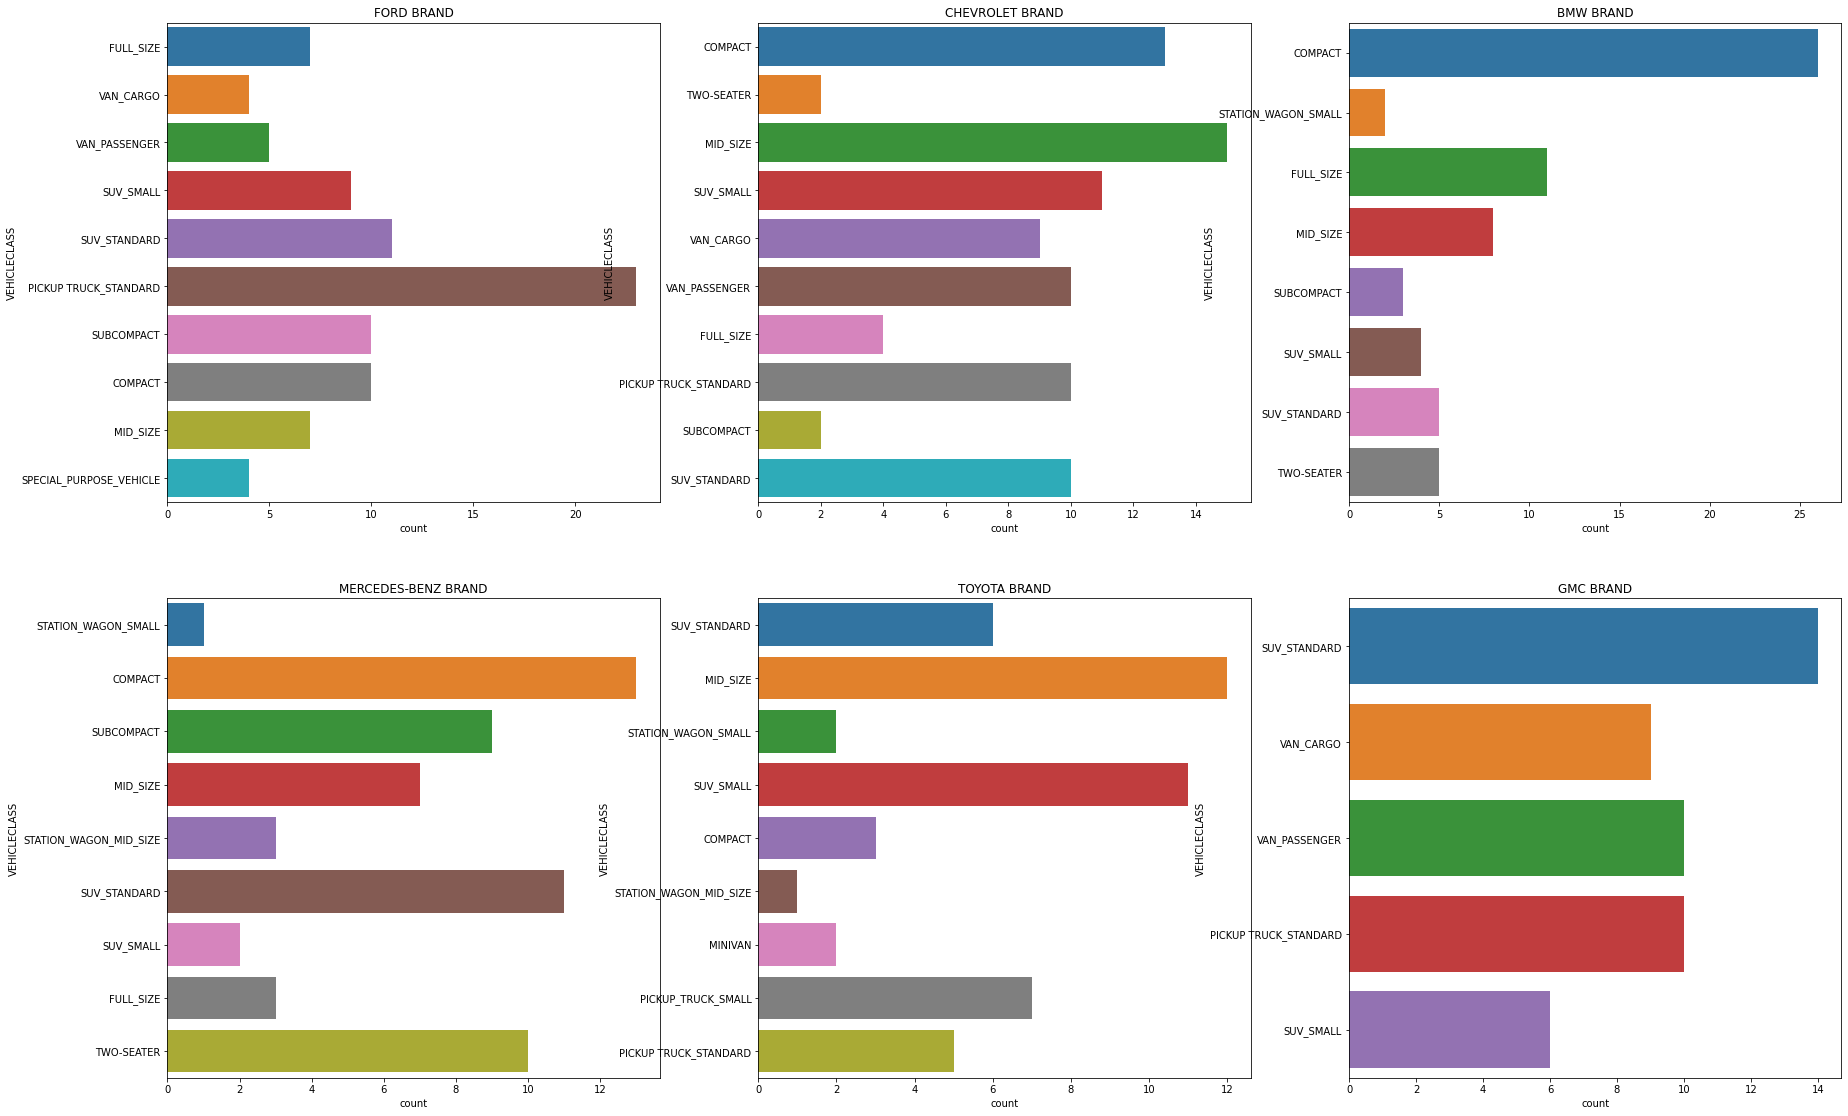

In [50]:
plt.figure(figsize=[30,30])
for i,name in enumerate(top_6_brand):
    plt.subplot(3,3,i+1)
    sns.countplot(y='VEHICLECLASS',data=df_top_6[df_top_6['BRANDS']==top_6_brand[i]])
    plt.title(f'{top_6_brand[i]} BRAND')


> ###### most of GMC Cars are (SUV TRUCKS or van) 

# 5 What is The `CO2EMISSIONS` for Each   `VEHICLECLASS`  in 'GMC' `BRANDS` ?

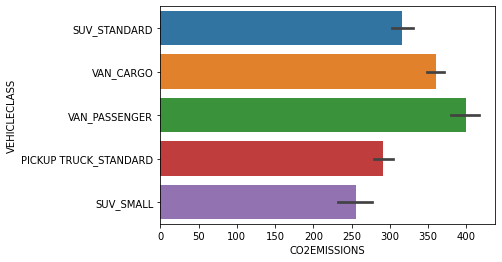

In [54]:
df_top_6[df_top_6['BRANDS']=='GMC']

sns.barplot(x='CO2EMISSIONS',y='VEHICLECLASS',data=df_top_6[df_top_6['BRANDS']=='GMC'])

> ###### most of GMC Cars are (SUV TRUCKS or van) , and also any Van VEHICLE emit more co2 than any VEHICLE type 

# 6 What is The `FUELTYPE`  in 'GMC' `BRAND` , that have most Co2 Emission ?

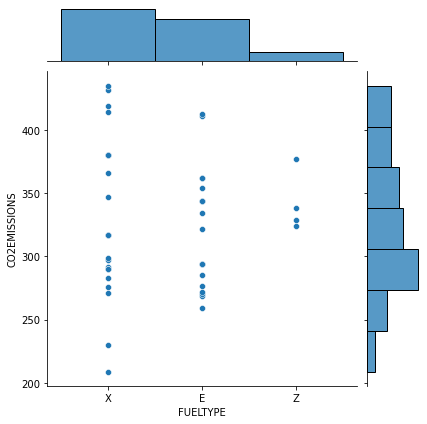

In [52]:
sns.jointplot(y='CO2EMISSIONS',x='FUELTYPE',kind='scatter',data=df_top_6[df_top_6['BRANDS']==top_6_brand[-1]])

> ###### most of GMC Cars are using Fuel X  , and that may indicate that fuel x is cheaper than other fuel tpyes , because it' used a lot ,    

# 7.Dose The Engine size ,Number of Cylinders Affect the Top 5 Car Brands Carbon Dioxide Emission?

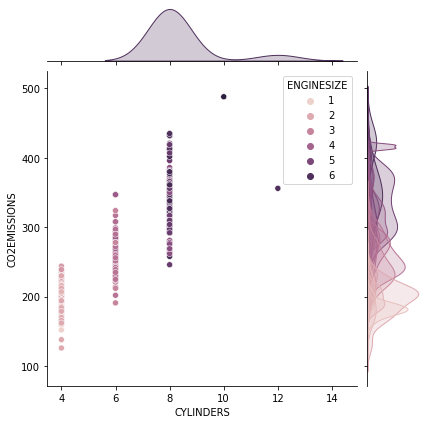

In [15]:

sns.jointplot(x='CYLINDERS',y='CO2EMISSIONS',kind='scatter',data=df_top_6,hue='ENGINESIZE')


> ###### The Higher the Number of Cylinders in Car , the larger the engine size can get and that can produce higher CO2 emission

# 8.What is The Car VEHICLECLASS that `CO2EMISSIONS`== 500 and `CYLINDERS` == 10

In [49]:
df_top_6[(df_top_6['CO2EMISSIONS']==df_top_6['CO2EMISSIONS'].max())&(df_top_6['CYLINDERS']==10)]['VEHICLECLASS']

349    VAN_PASSENGER
Name: VEHICLECLASS, dtype: object

# 9.What is The Car BRAND that `CO2EMISSIONS`== 500 and `CYLINDERS` == 10

In [48]:
df_top_6[(df_top_6['CO2EMISSIONS']==df_top_6['CO2EMISSIONS'].max())&(df_top_6['CYLINDERS']==10)]['BRANDS']

349    FORD
Name: BRANDS, dtype: object

# 10. is There Relatione between the `MODELYEAR` and `CO2EMISSIONS` ?

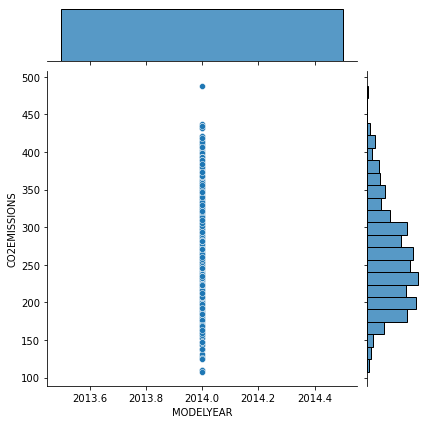

In [21]:
sns.jointplot(x='MODELYEAR',y='CO2EMISSIONS',data=df)

> ###### only 2014 Car Models Were Found  ,so no relation can be found between  `MODELYEAR` ,`CO2EMISSIONS`